## Adult income prediction

Your task is to analyze this dataset and develop a predictive model that can accurately determine whether an individual makes more than $50K a year based on the provided features.

For completing this tasks we will be doing the following steps:
1. Data cleaning and preprocessing
2. Exploratory Data Analysis
3. Feature selection/Engineering
4. Model development
5. Model evaluation
6. Conclusion

Let's get it!

First of all we need to define every column that we have, this will enable us to understand every column and how that affects the target column.
1. age: Category of range of age
2. workclass: Where they develope its work, is it in goverment, private or what?
3. fnlwgt: how represented is that population (in the native country) in units
4. education: Last degree achieved
5. education-num: years of education
6. marital-status: if that population is married, divorced or what_
7. occupation
8. relationship: role in family
9. race
10. sex
11. capitalgain: income (other sources than salary)
12. capitalloss: income (other sources that salary)
13. hourperweek: working hours
14. native-country
15. class: whether the person's incoming is greater that $50K

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

#### 1. Data cleaning and preprocessing

Actually our first step will be acquiring the data from the following url on datahub about [adult's employment](https://datahub.io/machine-learning/adult/r/1.html). 


In [5]:
adults = pd.read_csv('https://datahub.io/machine-learning/adult/r/1.csv')
adults.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


First we are going to see whats the original size of the dataset, then, we'll get the types of the data and see if there's any inconsistency (for example, an age column not as an integer). 
Then we're going to check for duplicates and remove them. Later, we are going to check for nulls on data and treat them with some missing values technique.
Finally, we will drop the columns that we aren't using on our model

In [6]:
print('--- Checking shape of dataset ---')
print(adults.shape)
print('--- Checking types of dataset ---')
print(adults.dtypes)

--- Checking shape of dataset ---
(48842, 15)
--- Checking types of dataset ---
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capitalgain        int64
capitalloss        int64
hoursperweek       int64
native-country    object
class             object
dtype: object


Let's check if there's any duplicate row and drop them off.

In [7]:
adults = adults.drop_duplicates()
print('--- Checking again shape of dataset ---')
print(adults.shape)

--- Checking again shape of dataset ---
(48655, 15)


In [8]:
print('--- Checking nulls on dataset ---')
print(adults.isnull().sum())

--- Checking nulls on dataset ---
age                  0
workclass         2777
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2787
relationship         0
race                 0
sex                  0
capitalgain          0
capitalloss          0
hoursperweek         0
native-country     854
class                0
dtype: int64


There's some null values that need treatment from our side, we identify that this columns are _workclass_, _occupation_ and _native-country_. In this case we have enough data so we're not going to make this more complex and just remove those rows with null values.


In [9]:
adults.dropna(inplace=True)

In [10]:
print('--- Checking again for nulls on dataset ---')
print(adults.isnull().sum())

--- Checking again for nulls on dataset ---
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      0
native-country    0
class             0
dtype: int64


In [11]:
adults[["education","education-num"]].drop_duplicates().sort_values(by='education-num')

,education,education-num
224,Preschool,1
416,1st-4th,2
56,5th-6th,3
15,7th-8th,4
6,9th,5
219,10th,6
3,11th,7
415,12th,8
2,HS-grad,9
10,Some-college,10


In [12]:
adults[["capitalgain"]].drop_duplicates().sort_values(by='capitalgain')

,capitalgain
1,0
0,1
9,2
105,3
8,4


Finally, we're dropping some columns that we aren't gonna use.
Reason why we drop _education_ is that we can get that from year studied, _fnlwgt_ we drop it for simplicity on our model and finally, we drop _relationship_ because we get that from _gender_ and _marital-status_.

In [13]:
adults.drop(['education', 'fnlwgt', 'relationship'], axis=1, inplace=True)

We will get into the EDA and then we will encode categorical data for using it in the model

#### 2. Exploratory Data Analysis

Our exploratory analysis would consist in three steps:
1. We are going to check for every distribution of every numerical value in order to see if there's any imbalance on data that would affect our model.
2. We are going to check on the percentage of presence in the dataset for every categorical value in order to check, also, if there's any imbalance.
3. We are going to use a correlation matrix in order to check which numerical value is the one who is more related to our target column

##### Numerical values

Age vs. class (income)

<Axes: xlabel='age', ylabel='Count'>

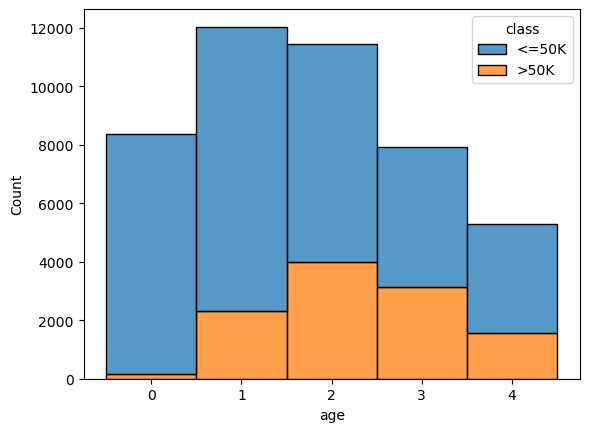

In [14]:
sns.histplot(adults, x='age', hue='class', multiple='stack', discrete=True)

It seems that the age column eventhough its a numerical value is representing a category or a range of ages, here we check if its well balanced (or that any range is well represented on dataset)

Education-num vs. class (income)

<Axes: xlabel='education-num', ylabel='Count'>

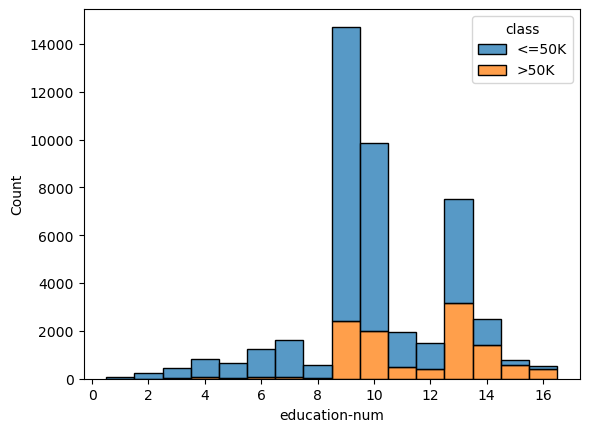

In [15]:
sns.histplot(adults, x='education-num', hue='class', multiple='stack', discrete=True)

Education-num seems to have a bimodal distribution, this allow us to understand that there's a need to separate the two populations that are inmerse there. We got more sample from people who got at least a HS-degree.

capitalgain vs. class (income)

<Axes: xlabel='capitalgain', ylabel='Count'>

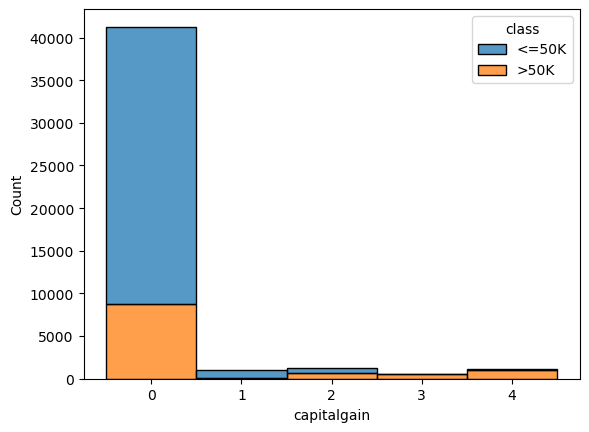

In [16]:
sns.histplot(adults, x='capitalgain', hue='class', multiple='stack', discrete=True)

This could definitive lead a imbalanced problem because must of our sample is related to the category of capitalgain = 0. We need to drop this column too.

Capitalloss vs. class (income)

<Axes: xlabel='capitalloss', ylabel='Count'>

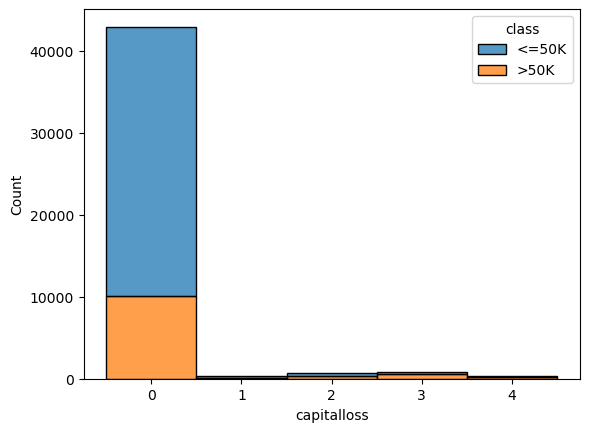

In [17]:
sns.histplot(adults, x='capitalloss', hue='class', multiple='stack', discrete=True)

Same here.

Hoursperweek vs. class (income)

<Axes: xlabel='hoursperweek', ylabel='Count'>

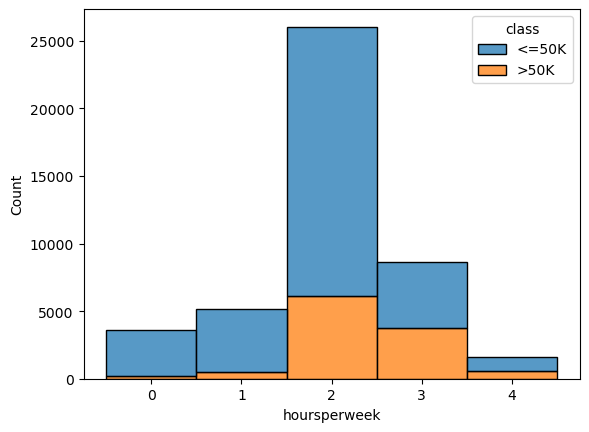

In [18]:
sns.histplot(adults, x='hoursperweek', hue='class', multiple='stack', discrete=True)

##### Categorical values

Marital-status vs. class (income)

In [43]:
fig = px.treemap(adults.groupby(['marital-status', 'class'])['class'].count().reset_index(name="count"), path=['class', 'marital-status'], values='count')
fig.update_layout(width=800)
fig.show()

Is interesting here that the category that's better represent is _married-civ-spouse_ in both case, but it also come to my knowledge that the samples are greater on the <=50K category.

In [45]:
fig = px.treemap(adults.groupby(['occupation', 'class'])['class'].count().reset_index(name="count"), path=['class', 'occupation'], values='count')
fig.update_layout(width=800)
fig.show()

In [46]:
fig = px.treemap(adults.groupby(['race', 'class'])['class'].count().reset_index(name="count"), path=['class', 'race'], values='count')
fig.update_layout(width=800)
fig.show()

No surprise here, our samples are more about white people than other races

In [47]:
fig = px.treemap(adults.groupby(['sex', 'class'])['class'].count().reset_index(name="count"), path=['class', 'sex'], values='count')
fig.update_layout(width=800)
fig.show()

In [48]:
fig = px.treemap(adults.groupby(['native-country', 'class'])['class'].count().reset_index(name="count"), path=['class', 'native-country'], values='count')
fig.update_layout(width=800)
fig.show()

The sample is related mostly to US so we aren't gonna use it. We need to drop this column too.

In [49]:
adults.drop(['capitalgain', 'capitalloss', 'native-country'], axis=1, inplace=True)

In [50]:
adults.head()

,age,workclass,education-num,marital-status,occupation,race,sex,hoursperweek,class
0,2,State-gov,13,Never-married,Adm-clerical,White,Male,2,<=50K
1,3,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,0,<=50K
2,2,Private,9,Divorced,Handlers-cleaners,White,Male,2,<=50K
3,3,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,2,<=50K
4,1,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,2,<=50K


In [54]:
adults['target'] = np.where(adults['class'] == '>50K', 1, 0)
adults.drop(['class'], axis=1, inplace=True)
adults.head()

,age,workclass,education-num,marital-status,occupation,race,sex,hoursperweek,target
0,2,State-gov,13,Never-married,Adm-clerical,White,Male,2,0
1,3,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,0,0
2,2,Private,9,Divorced,Handlers-cleaners,White,Male,2,0
3,3,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,2,0
4,1,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,2,0


#### 3. Feature selection/Engineering

##### Correlation analysis (Numerical values)

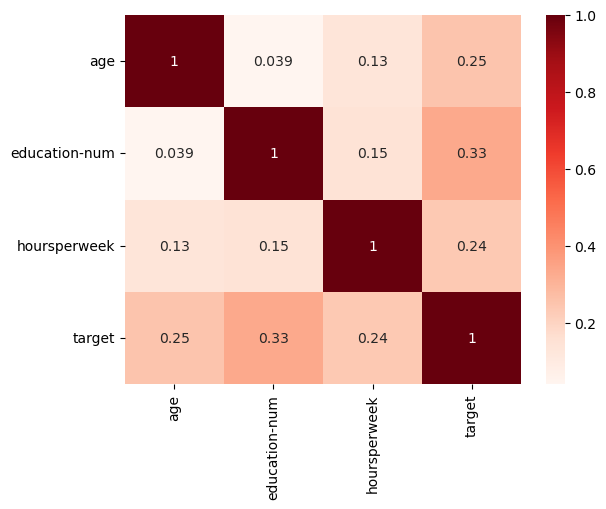

In [56]:
cor = adults.corr(numeric_only=True)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Ok, this is interesting! It seems that the more educated you are, the more like you are to earn elevated income. I'd would expect that correlation was a little bit more bigger though, at least 60%, the good thing is that there's well balance that correlation throughout every numerical column. We won't discard anything here.

We will end up using:
- Numerical:
    1. age
    2. education-num
    3. hoursperweek
- Categorical:
    1. workclass
    2. marital-status
    3. occupation
    4. race
    5. sex

Transforming categorical data (label encoding)

In [61]:
encoder = LabelEncoder()
adults['workclass'] = encoder.fit_transform(adults['workclass'])
adults['marital-status'] = encoder.fit_transform(adults['marital-status'])
adults['occupation'] = encoder.fit_transform(adults['occupation'])
adults['race'] = encoder.fit_transform(adults['race'])
adults['sex'] = encoder.fit_transform(adults['sex'])

In [62]:
adults.head()

,age,workclass,education-num,marital-status,occupation,race,sex,hoursperweek,target
0,2,5,13,4,0,4,1,2,0
1,3,4,13,2,3,4,1,0,0
2,2,2,9,0,5,4,1,2,0
3,3,2,7,2,5,2,1,2,0
4,1,2,13,2,9,2,0,2,0


Every column seems to be in the same number range so we aren't going to do a scaling formating.

#### 4. Model development

##### Logistic Regression

Here I'm portraying one way to predict the outcome of the income from the dataset. What I would normally do is to propose at least 3 different model techniques in order to compare their performances and choose the best. But for simplicity I will use this logistic regression which allow us to predict a binary outcome.

In [63]:
adults.head()

,age,workclass,education-num,marital-status,occupation,race,sex,hoursperweek,target
0,2,5,13,4,0,4,1,2,0
1,3,4,13,2,3,4,1,0,0
2,2,2,9,0,5,4,1,2,0
3,3,2,7,2,5,2,1,2,0
4,1,2,13,2,9,2,0,2,0


Splitting training and test datasets

In [67]:
X = adults.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
y = adults.iloc[:, 8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31541, 8)
(13518, 8)
(31541,)
(13518,)


Fitting logistic regression and predicting test results

In [68]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [70]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result.head(100)

,Actual,Predicted
29372,0,0
19597,0,0
30751,0,0
24785,0,1
28777,0,0
...,...,...
6375,0,0
46750,0,0
6100,0,0
24050,0,0


#### 5. Model evaluation

Using a confusion matrix to evaluate our model

Text(0.5, 23.52222222222222, 'Predicted label')

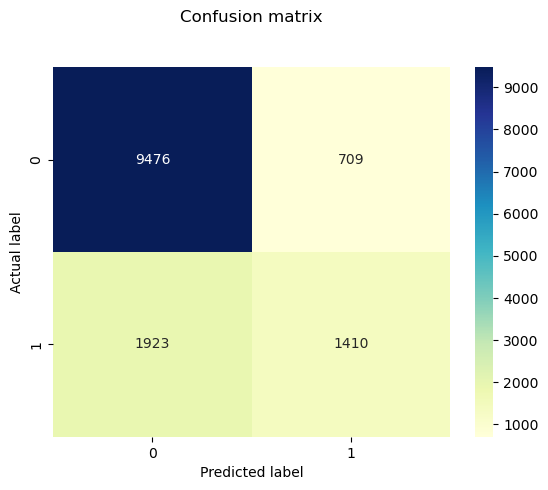

In [71]:
cf_m = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cf_m), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

And finally calculating our accuracy score, 80% seems ideal as it's indicating that we aren't overfitting

In [74]:
accuracy_score(y_test, y_pred)*100

80.5296641515017

#### 6. Conclusion

1. Education, fnlwgt and relationship would add any value to the prediction about income. We have that information in other variables.
2. In this dataset we've got a lot of label enconding of numerical values (such as age and hours per week) that's why it makes sense to still use that methods for transforming data
3. Analyzing categorical values allow us to eliminate variables that can lead to imbalance datasets (such as this talking about native-country, etc.)
4. The numerical value that is more correlated to income is the number of years you studied although it isn't HIGHLY correlated.
5. Logistic regression give us a very simple classification method that allow us to predicte two possible outcomes (> $50k income or not)
6. 80% of accuracy on our model give us a very well suited model to start with 